# Scatterplots and Correlation

In this section, we will be exploring bivariate visualizations through the use of this dataset:**fuel efficiency**.
The data consists of over 3900 sedans, with manufacturing years from 2013 to 2018,and only considers conventional fuels.

Let's start by looking at the relationship between two quantitative variables,the engine displacement in liters,
and the overall fuel mileage in miles per gallon. 

In [10]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('../Code/fuel-econ.csv')

In [7]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8



If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:

Text(0,0.5,'Combined fuel Eff (mpg).')

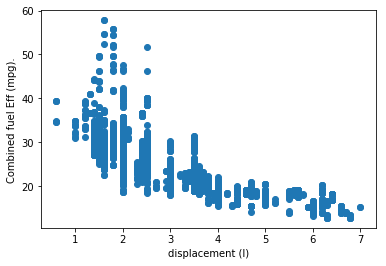

In [8]:
plt.scatter(data=df,x='displ',y='comb')
plt.xlabel('displacement (l)')
plt.ylabel('Combined fuel Eff (mpg).')

We can see a generally negative relationship between the two variables, as higher values of the x-axis variable are associated with greatly decreasing values of the variable plotted on the y-axis.

# Alternative Approach

Seaborn's **regplot** function combines scatterplot creation with regression function fitting:

The basic function parameters, "data", "x", and "y" are the same for regplot as they are for matplotlib's scatter.



Text(0,0.5,'Combined fuel Eff (mpg).')

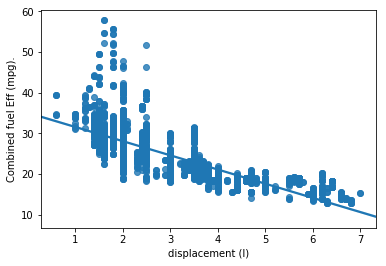

In [9]:
sb.regplot(data=df,x='displ',y='comb')
plt.xlabel('displacement (l)')
plt.ylabel('Combined fuel Eff (mpg).')

By default, the regression function is linear, and includes a shaded confidence region for the regression estimate. 

In some  case, since the trend looks like a **log(y)∝ x** relationship (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set **fit_reg = False** in the regplot function call. 

Otherwise, if we want to plot the regression line on the observed relationship in the data, we need to transform the data, as seen in the previous lesson.

In [22]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

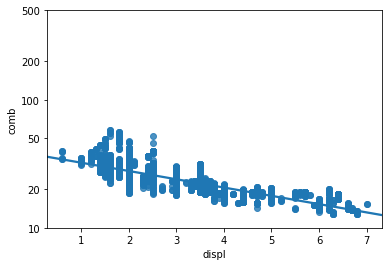

In [23]:
sb.regplot(df['displ'], df['comb'].apply(log_trans));
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs);

In this example, the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.